In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ds = pd.read_csv('3_clean.csv')
data = ds
print(data.head())

print(data.describe())

      timestamp_call_key  retailer_code       serial  reason  \
0  240315173250 DAL1OA3M              0  10010009499       0   
1  240315124742 DAL15XHK              1  10006021998       1   
2  240317114237 DAL3BLK6              2  10016007830       2   
3  240314120849 PHX6PL4U              1  10008003199       1   
4  240314145902 DAL68RYS              3  10013002037       1   

                    mos  resolved  no_of_accounts_with_syf_13_march  \
0              IA PP TR         0                               1.0   
1        IA BA TS nl TR         1                               2.0   
2  IA AA BA MR nl PT TR         0                              12.0   
3                 IA BA         0                               2.0   
4     IA BA TS nl mm TR         1                               6.0   

   account_balance_13_march  delinquency_history_13_march  \
0                       NaN                             0   
1                    143.28                             0   
2    

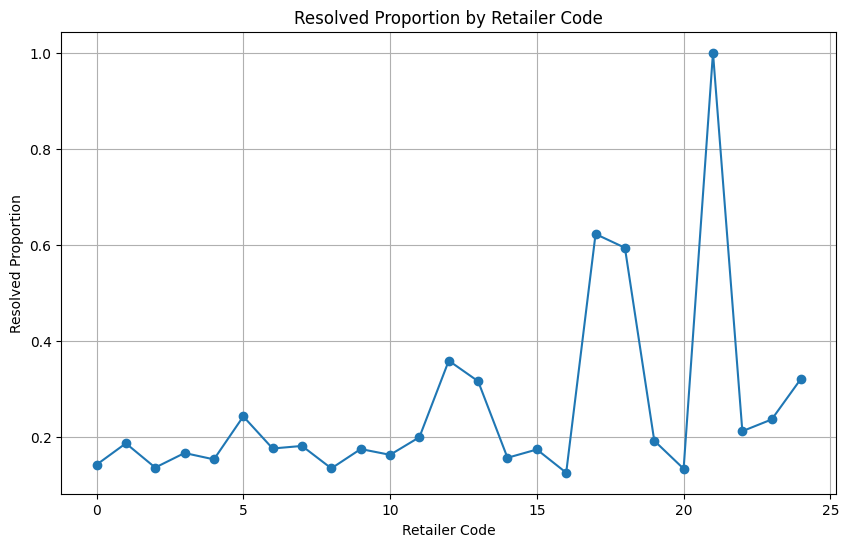

In [2]:
n = data['retailer_code'].max()

resolved_proportions = []

for code in range(n + 1):
    filtered_data = data[data['retailer_code'] == code]
    if not filtered_data.empty:
        resolution_counts = filtered_data['resolved'].value_counts(
            normalize=True)
        resolved_proportion = resolution_counts.get(1, 1)
        resolved_proportions.append(resolved_proportion)
    else:
        resolved_proportions.append(0)

plt.figure(figsize=(10, 6))
plt.plot(range(n + 1), resolved_proportions, marker='o', linestyle='-')
plt.title('Resolved Proportion by Retailer Code')
plt.xlabel('Retailer Code')
plt.ylabel('Resolved Proportion')
plt.grid(True)
plt.show()

In [3]:
filtered_data = data[data['retailer_code'] == 17]

resolution_counts = filtered_data['resolved'].value_counts()

resolution_proportions = resolution_counts / resolution_counts.sum()

print("Resolution proportions for retailer_code 4:")
print(resolution_proportions)

retailer_code_count = data['retailer_code'].value_counts().get(17, 0)

print(f"Number of rows: {retailer_code_count}")

Resolution proportions for retailer_code 4:
resolved
1    0.622549
0    0.377451
Name: count, dtype: float64
Number of rows: 204


In [5]:
filtered_data = data[data['retailer_code'] == 17]

mos_values = filtered_data['mos']
mos_values

3120      IA BA MR nl mm mo mt RS TR
21536                 IA BA TS nl TR
21537        IA BA TS nl mm mt RS TR
21538           IA BA TS nl mt RS TR
30711                       IA PP TR
                     ...            
873436                      IA PP TR
879939       IA PI BA TS nl mt RS TR
881472             IA BA TS nl PT TR
901943                         IA BA
901944                IA BA nl PT TR
Name: mos, Length: 204, dtype: object

In [7]:
value_counts = mos_values.value_counts()
print(value_counts)

frequency = mos_values.value_counts(normalize=True)
print(frequency)

mos
IA PP TR                            31
IA BA TS nl mt RS TR                15
IA BA                               13
IA BA TS nl TR                       9
IA AA TR                             8
                                    ..
IA PP BA TA nl PT TR                 1
IA AA BA TS nl RC HI nl mt RS TR     1
IA PI BA nl mt nl mm mo iR nl mm     1
IA PI BA TS nl SR TR                 1
IA BA nl PT TR                       1
Name: count, Length: 83, dtype: int64
mos
IA PP TR                            0.151961
IA BA TS nl mt RS TR                0.073529
IA BA                               0.063725
IA BA TS nl TR                      0.044118
IA AA TR                            0.039216
                                      ...   
IA PP BA TA nl PT TR                0.004902
IA AA BA TS nl RC HI nl mt RS TR    0.004902
IA PI BA nl mt nl mm mo iR nl mm    0.004902
IA PI BA TS nl SR TR                0.004902
IA BA nl PT TR                      0.004902
Name: proportion, Length: 83, 

<Figure size 1000x600 with 0 Axes>

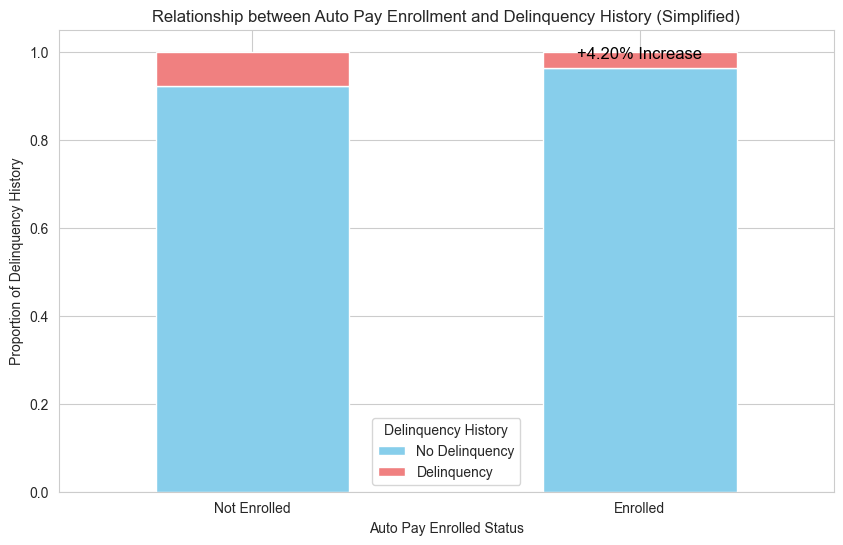

In [11]:
data['delinquency_history_simplified'] = data['delinquency_history_13_march'].apply(
    lambda x: 0 if x == 0 else 1)

cross_tab = pd.crosstab(data['auto_pay_enrolled_status_13_march'],
                        data['delinquency_history_simplified'], normalize='index')

proportion_difference = cross_tab.loc[1, 0] - cross_tab.loc[0, 0]

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
cross_tab.plot(kind='bar', stacked=True, color=[
               'skyblue', 'lightcoral'], figsize=(10, 6))
plt.title(
    'Relationship between Auto Pay Enrollment and Delinquency History (Simplified)')
plt.xlabel('Auto Pay Enrolled Status')
plt.ylabel('Proportion of Delinquency History')
plt.xticks(ticks=[0, 1], labels=['Not Enrolled', 'Enrolled'], rotation=0)
plt.legend(title='Delinquency History', labels=[
           'No Delinquency', 'Delinquency'])

plt.text(1, cross_tab.loc[1, 0] + proportion_difference / 2,
         f'+{proportion_difference:.2%} Increase', fontsize=12, color='black', ha='center')

plt.show()